# Semantic Graph Visualizer

In [1]:
import os
import pickle
import matplotlib.pyplot as plt
from src.graph_processor import MapProcessor
map_idxs = [False, False, True, True, False, False, True, True, True, False]

# Step by step Simplification Pipeline

In [2]:
# 2
base_dir = 'datasets/amelia'
airport  = 'ksea'
out_dir = f"out"
processor = MapProcessor(base_dir, out_dir, airport, save=False, show=True)

In [3]:
raw_stats = processor.get_aiport_stats()

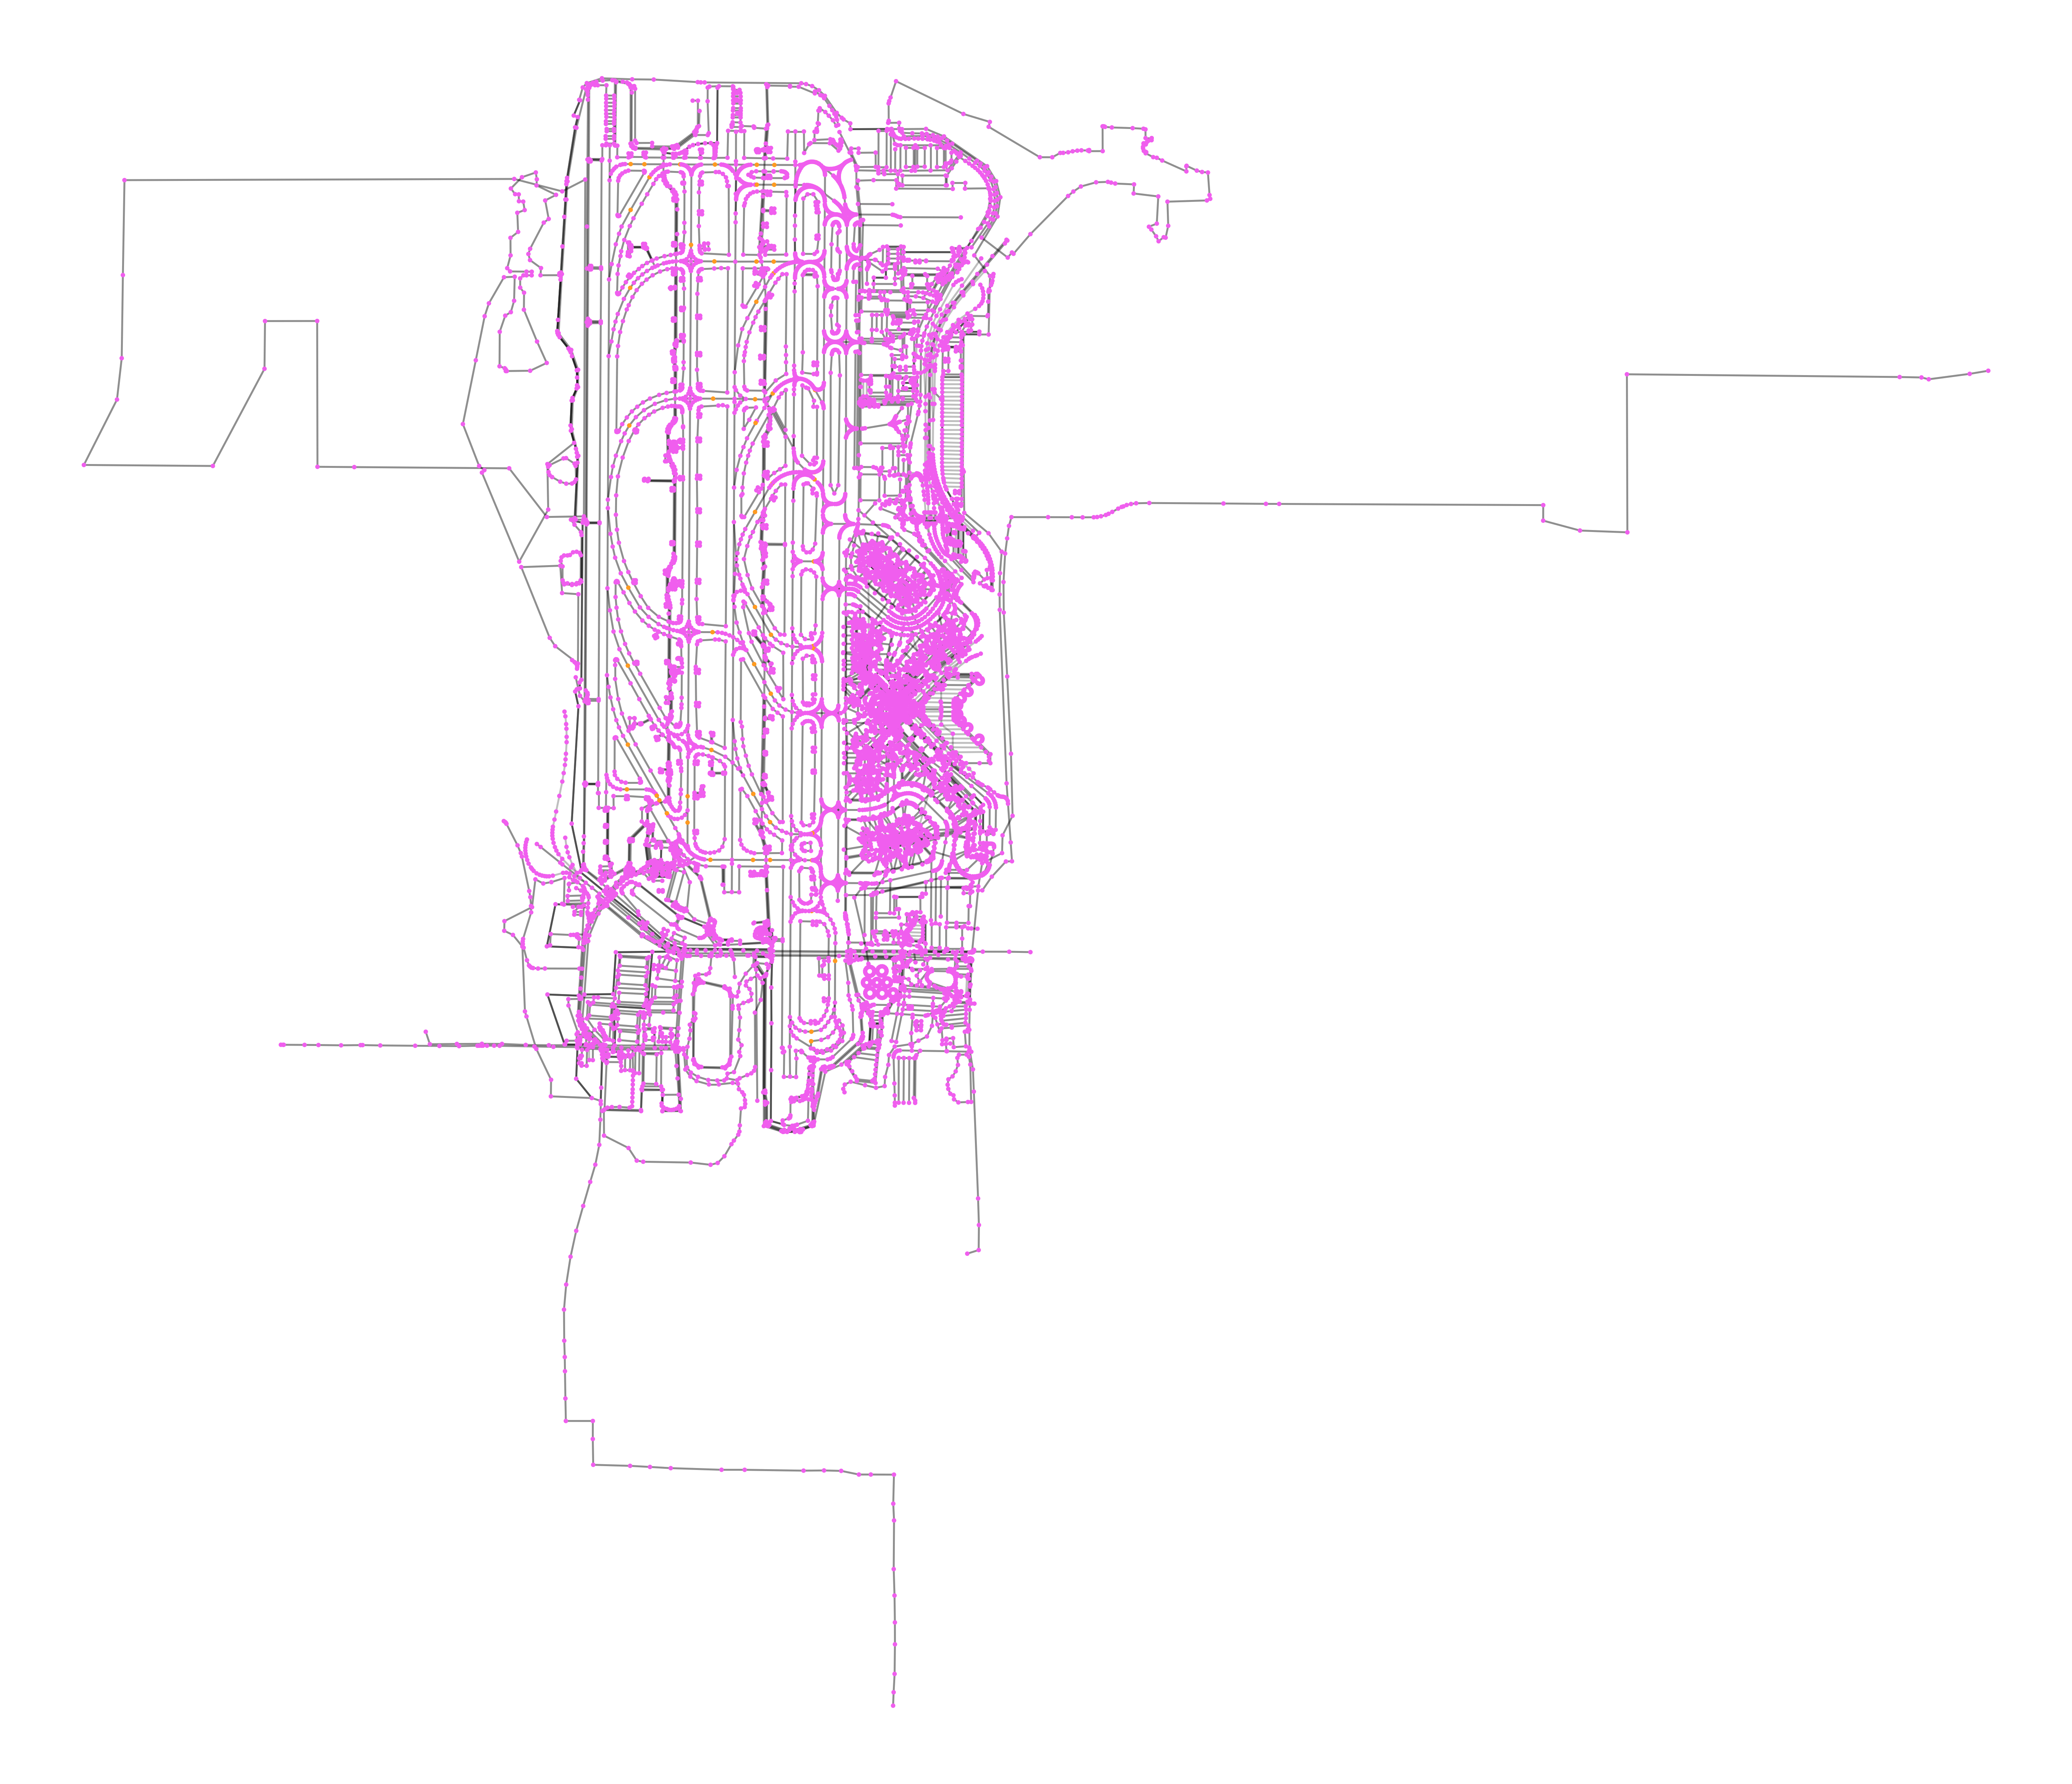

In [4]:
processor.semantify_nodes()
processor.display_and_save(save=False, show=True)

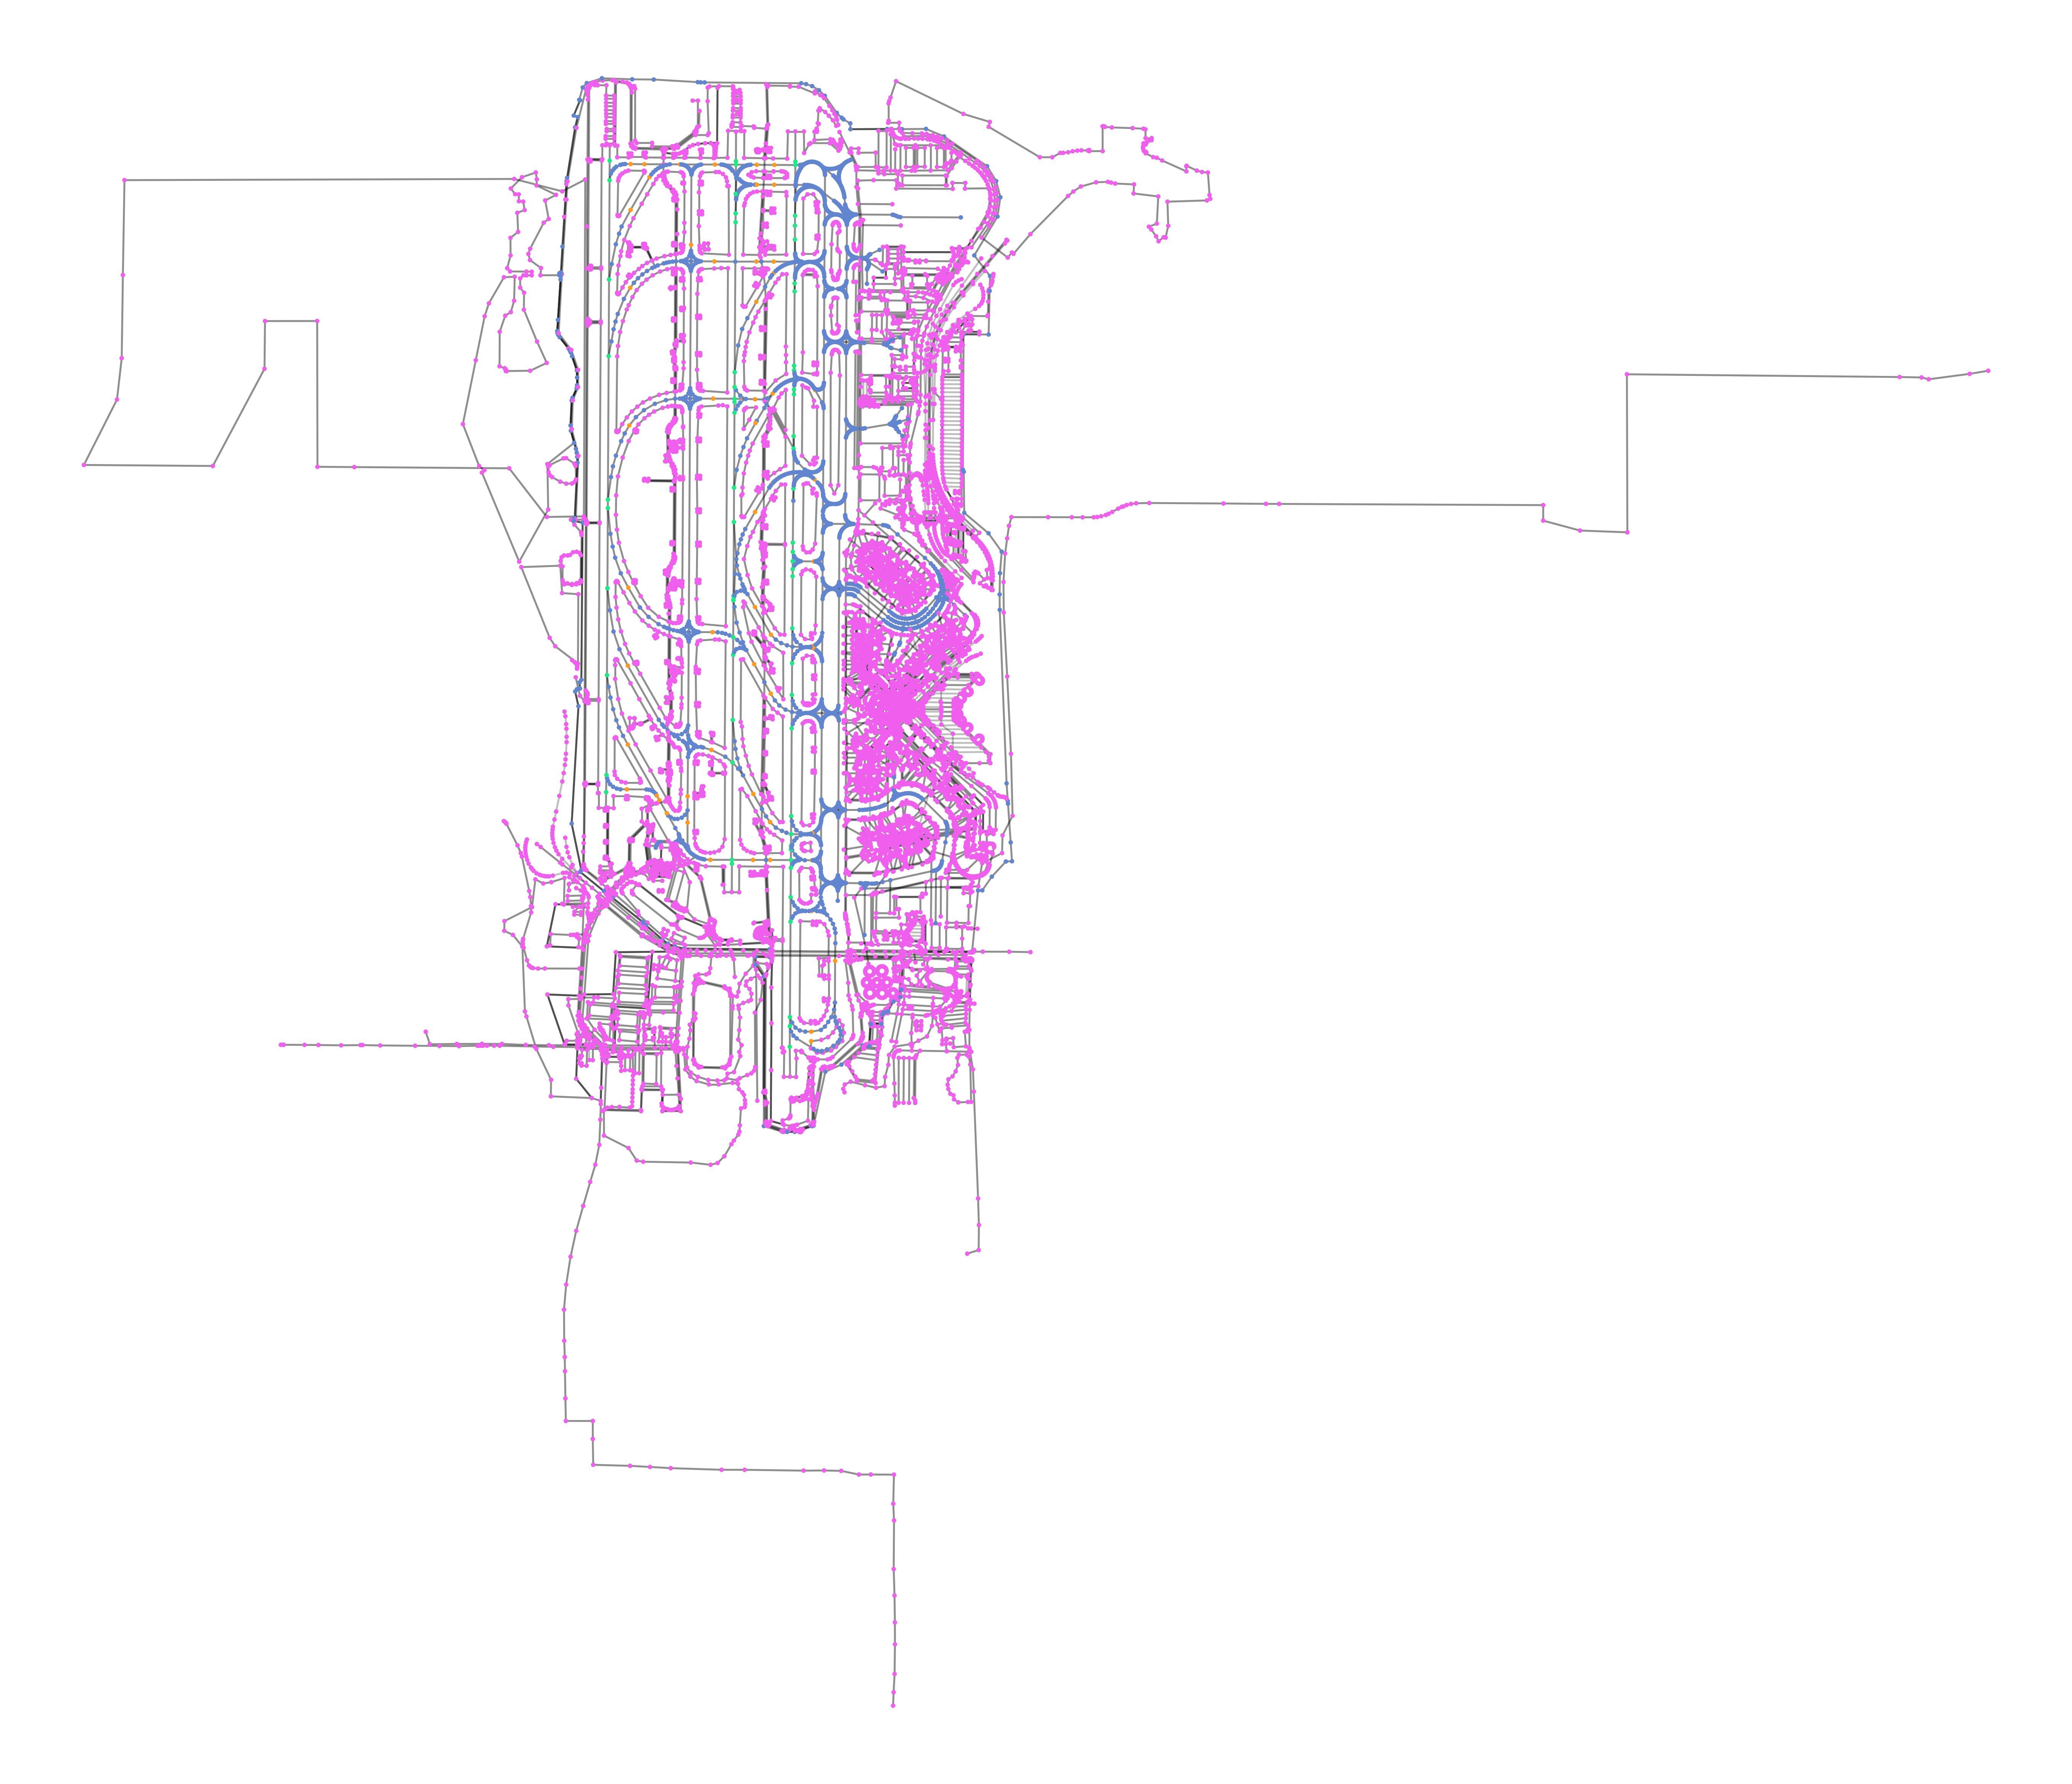

In [5]:
processor.get_routing_graph()
processor.display_and_save(False, True)

In [6]:
# Get raw data stats
stats = processor.get_aiport_stats()
from utils.graph_utils import print_stats
print_stats(stats)

Airport KSEA Summary
------------------------------
╒═══════════════════════╤═══════════════════╕
│       Statistic       │       Value       │
╞═══════════════════════╪═══════════════════╡
│        airport        │       ksea        │
├───────────────────────┼───────────────────┤
│      node_count       │       14353       │
├───────────────────────┼───────────────────┤
│      edge_count       │       30842       │
├───────────────────────┼───────────────────┤
│    average_degree     │ 4.297638124433917 │
├───────────────────────┼───────────────────┤
│ edge_length_total (m) │ 729253.4449392217 │
├───────────────────────┼───────────────────┤
│  edge_length_avg (m)  │ 23.64481696839445 │
├───────────────────────┼───────────────────┤
│ self_loop_proportion  │        0.0        │
╘═══════════════════════╧═══════════════════╛


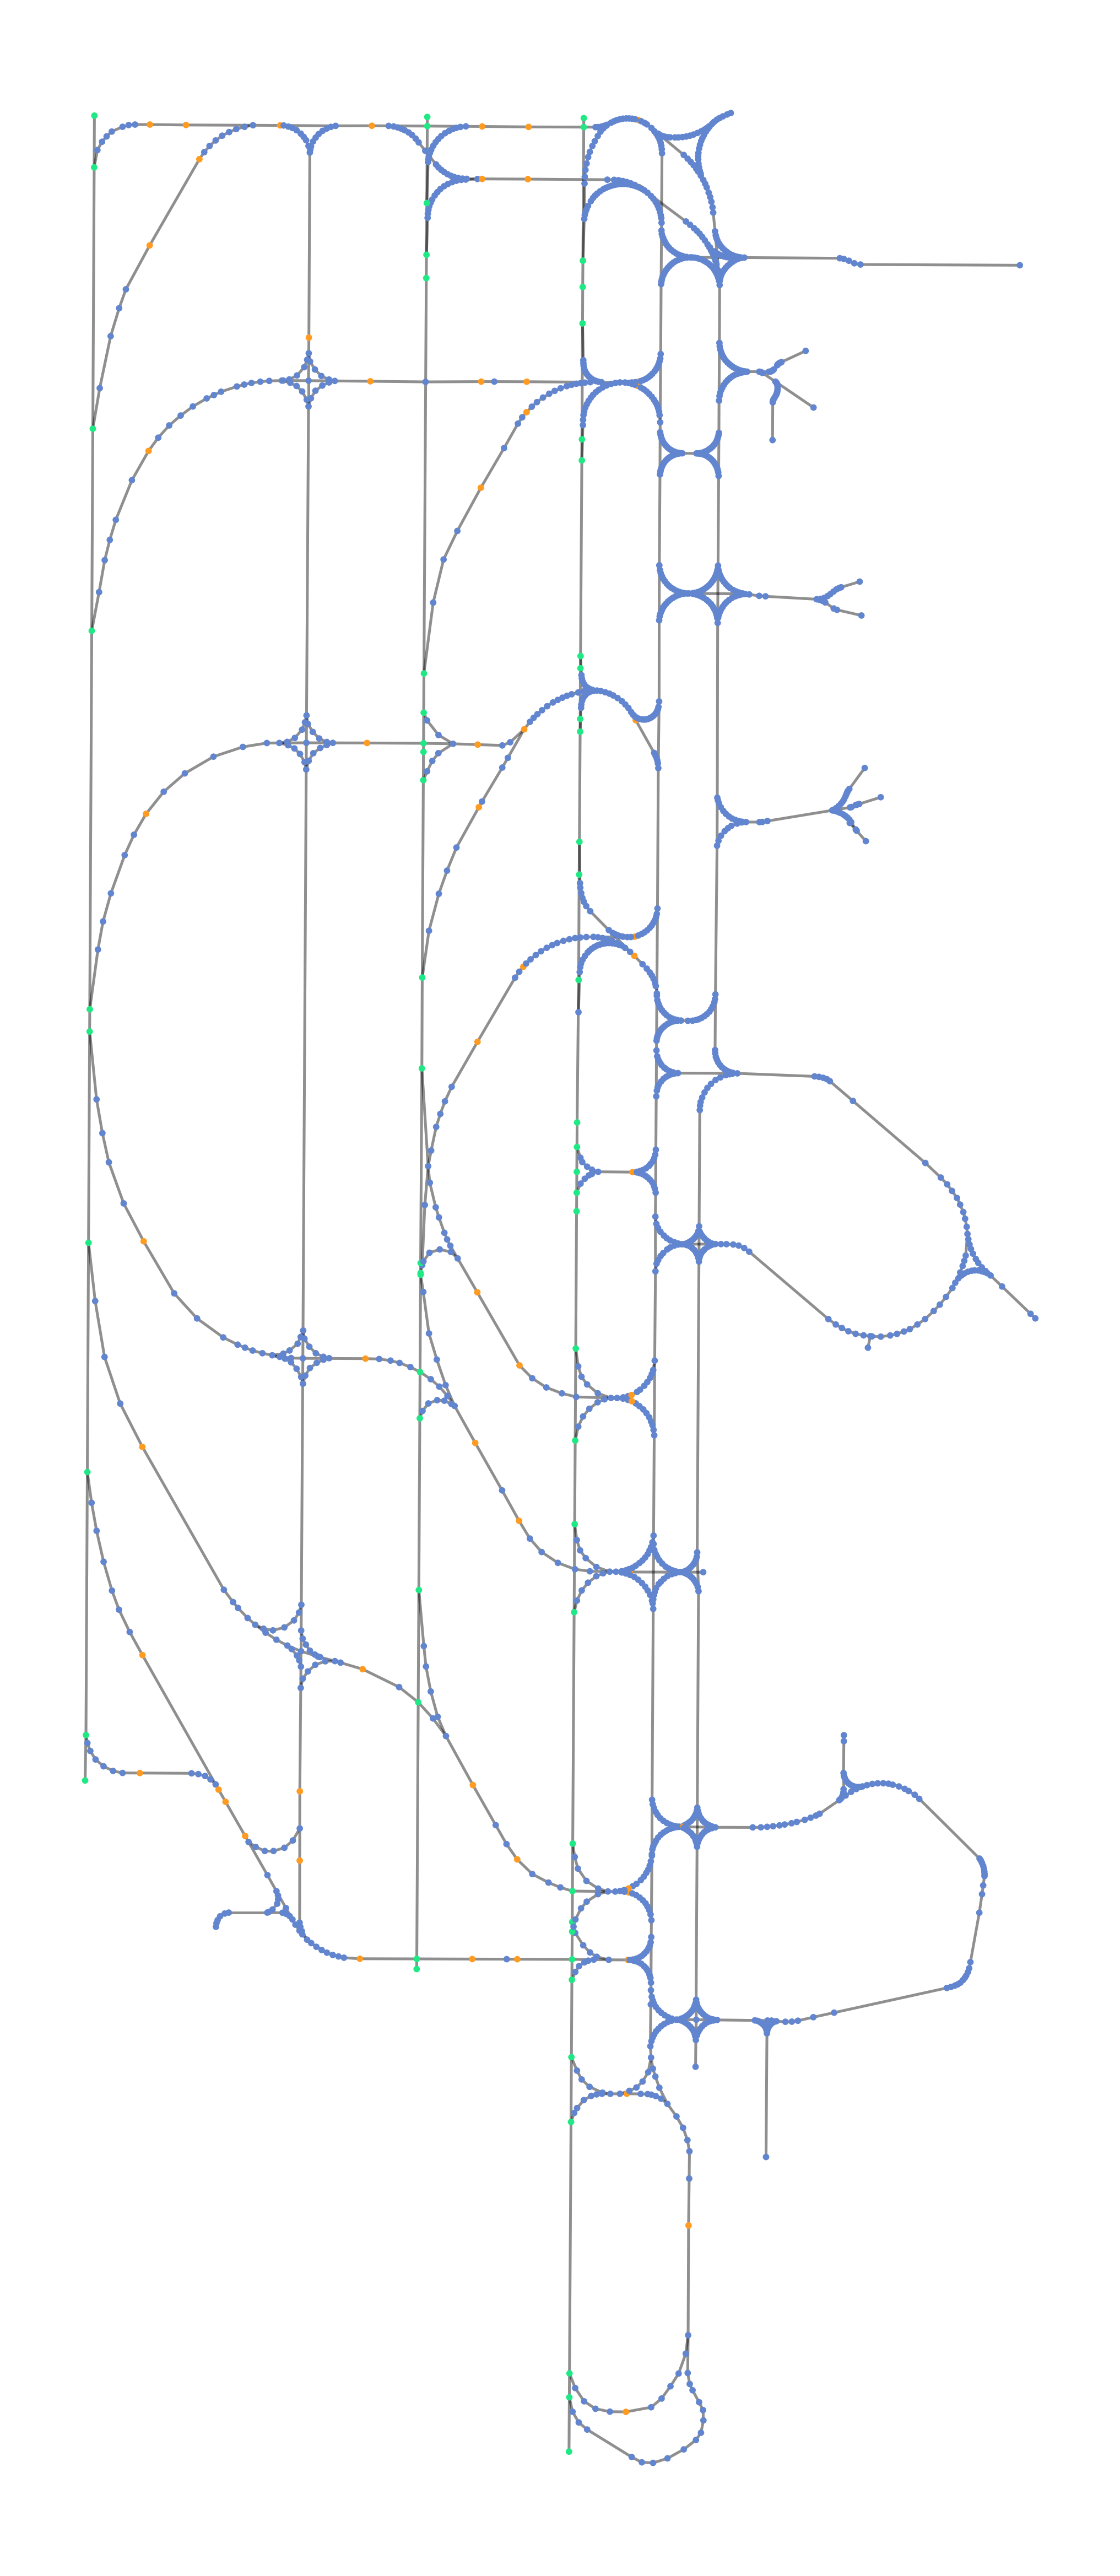

In [7]:
processor.sanitize()
processor.display_and_save(False, True)

In [8]:
stats = processor.get_aiport_stats()
from utils.graph_utils import print_stats
print_stats(stats)

Airport KSEA Summary
------------------------------
╒═══════════════════════╤════════════════════╕
│       Statistic       │       Value        │
╞═══════════════════════╪════════════════════╡
│        airport        │        ksea        │
├───────────────────────┼────────────────────┤
│      node_count       │        1934        │
├───────────────────────┼────────────────────┤
│      edge_count       │        4126        │
├───────────────────────┼────────────────────┤
│    average_degree     │ 4.266804550155119  │
├───────────────────────┼────────────────────┤
│ edge_length_total (m) │ 87761.49685918543  │
├───────────────────────┼────────────────────┤
│  edge_length_avg (m)  │ 21.270357939695934 │
├───────────────────────┼────────────────────┤
│ self_loop_proportion  │        0.0         │
╘═══════════════════════╧════════════════════╛


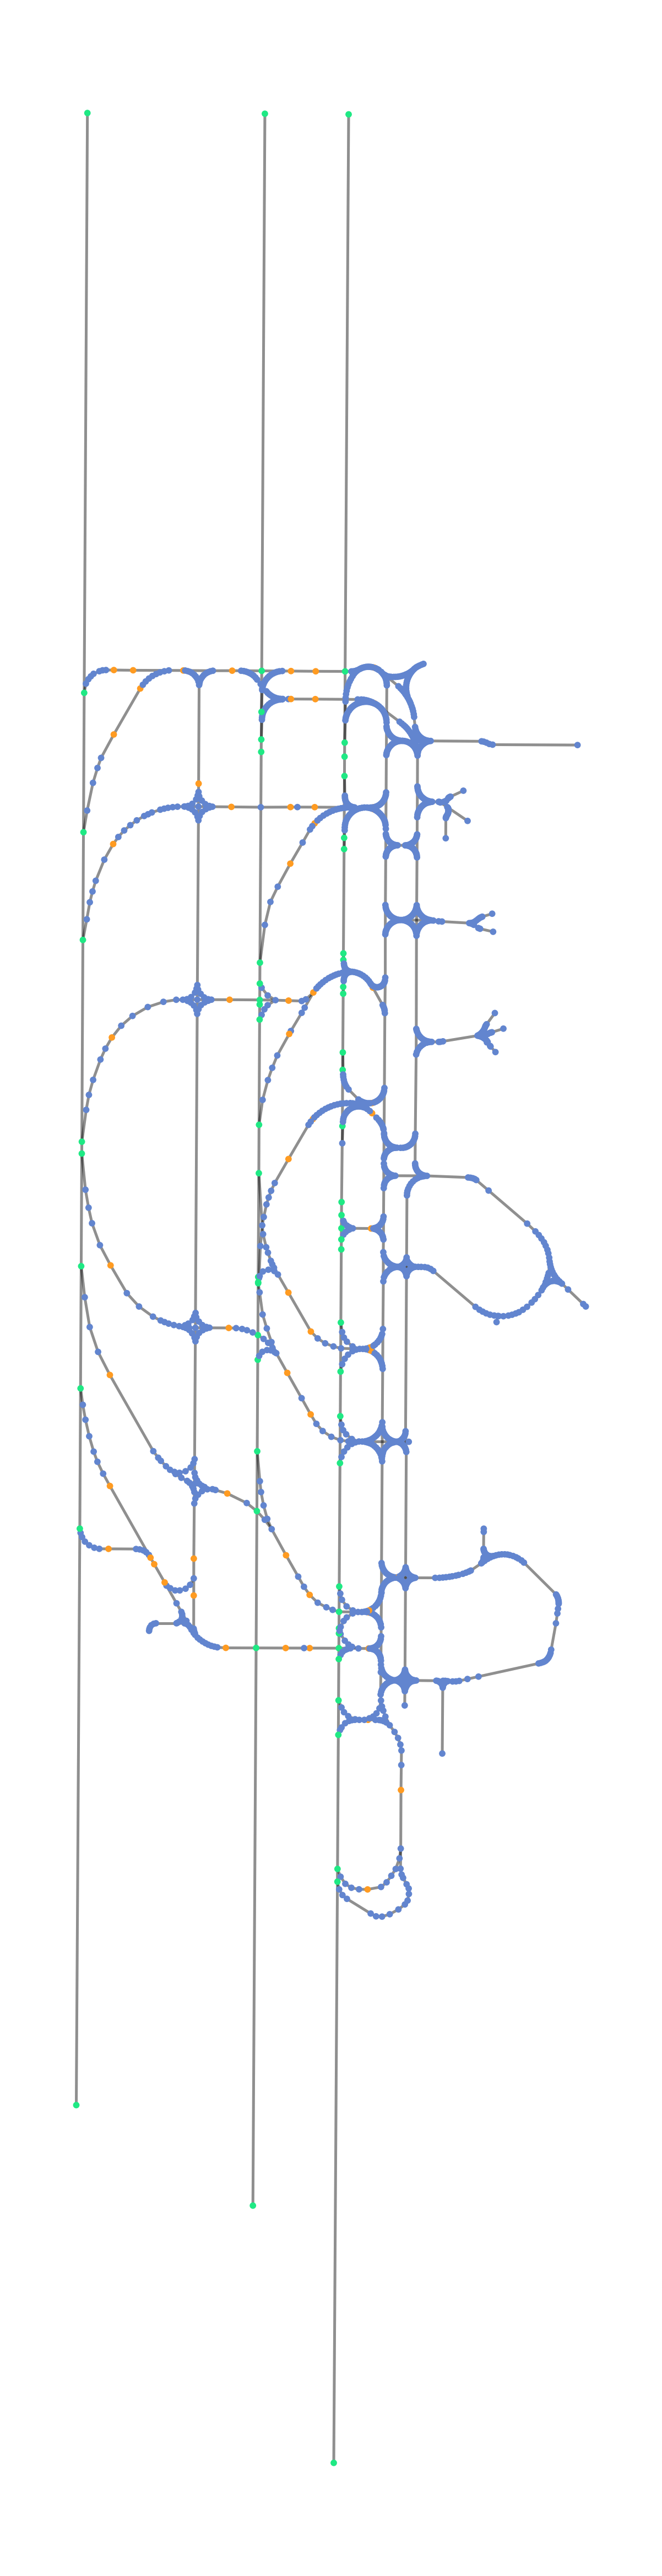

In [9]:
processor.extend_runways(extension_distance= 1609)
processor.display_and_save(False, True)

In [10]:
# Get filtered data stats
stats = processor.get_aiport_stats()
from utils.graph_utils import print_stats
print_stats(stats)

Airport KSEA Summary
------------------------------
╒═══════════════════════╤════════════════════╕
│       Statistic       │       Value        │
╞═══════════════════════╪════════════════════╡
│        airport        │        ksea        │
├───────────────────────┼────────────────────┤
│      node_count       │        1934        │
├───────────────────────┼────────────────────┤
│      edge_count       │        4126        │
├───────────────────────┼────────────────────┤
│    average_degree     │ 4.266804550155119  │
├───────────────────────┼────────────────────┤
│ edge_length_total (m) │ 107069.4837020052  │
├───────────────────────┼────────────────────┤
│  edge_length_avg (m)  │ 25.949947576831118 │
├───────────────────────┼────────────────────┤
│ self_loop_proportion  │        0.0         │
╘═══════════════════════╧════════════════════╛


In [11]:
processor.sanitize()

In [12]:
thr = 80 # meters
processor.supersample_graph(thr, node_separation = 80)

Saving to out/ksea/semantic_ksea.osm


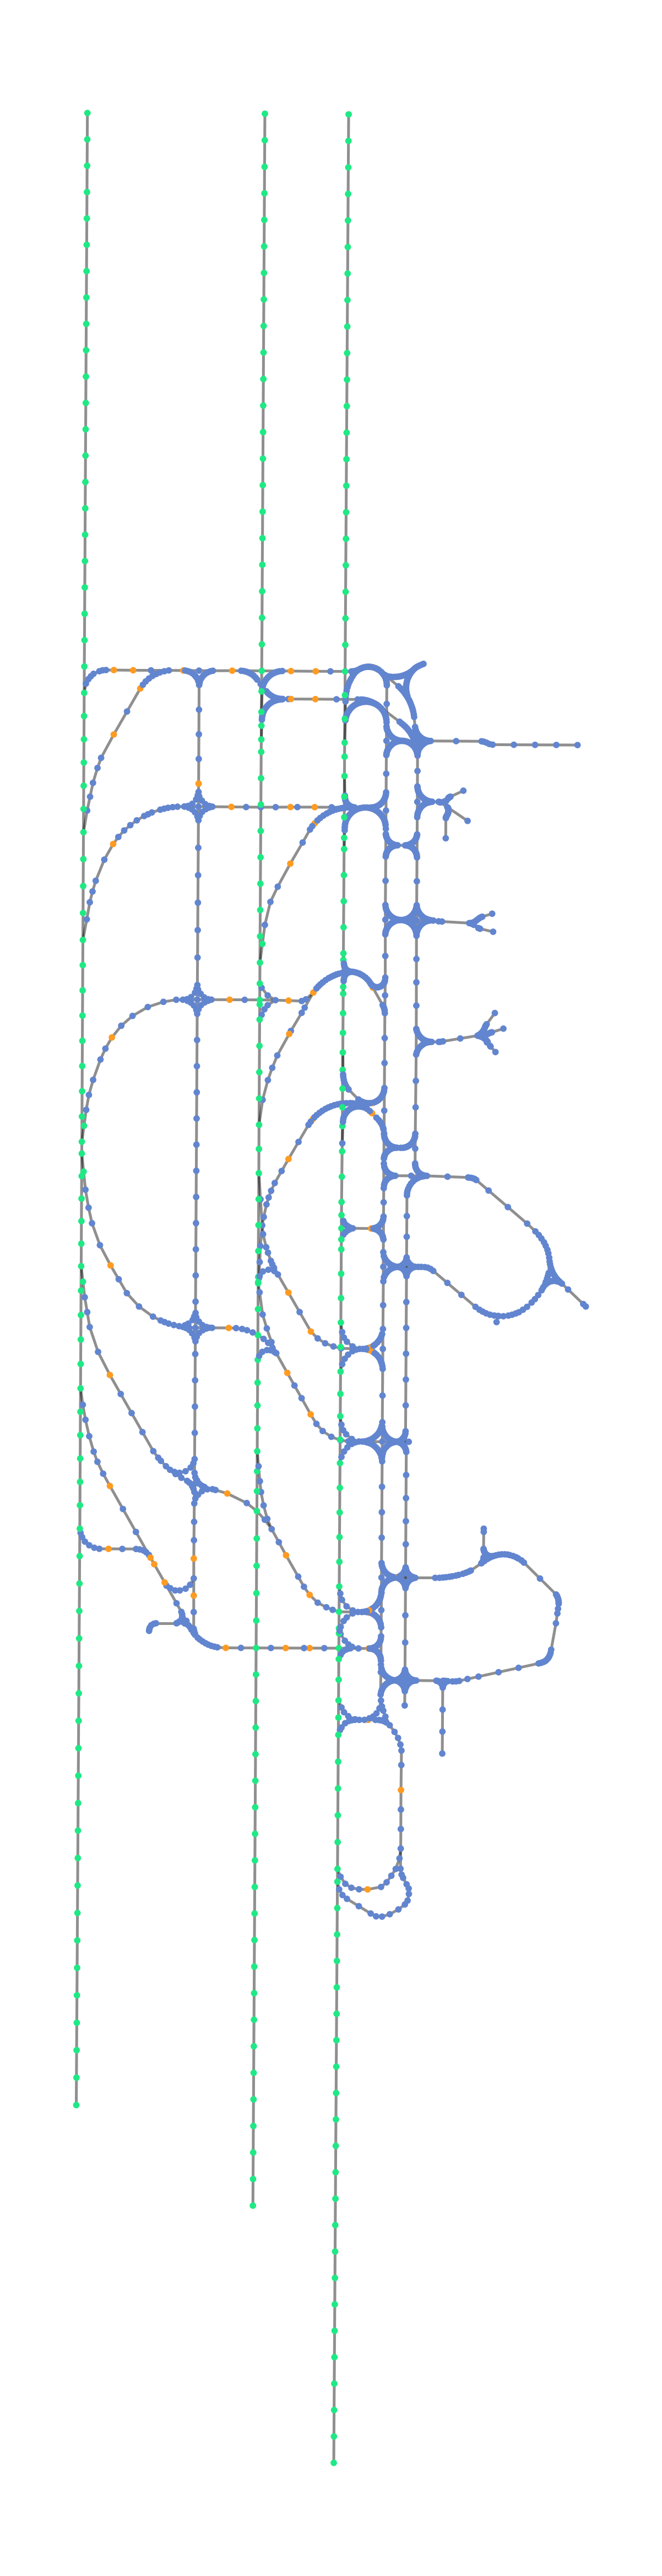

In [13]:
processor.display_and_save(True, True)

In [14]:
# Get final data stats
stats = processor.get_aiport_stats()
from utils.graph_utils import print_stats
print_stats(stats)

Airport KSEA Summary
------------------------------
╒═══════════════════════╤════════════════════╕
│       Statistic       │       Value        │
╞═══════════════════════╪════════════════════╡
│        airport        │        ksea        │
├───────────────────────┼────────────────────┤
│      node_count       │        2262        │
├───────────────────────┼────────────────────┤
│      edge_count       │        4782        │
├───────────────────────┼────────────────────┤
│    average_degree     │ 4.228116710875332  │
├───────────────────────┼────────────────────┤
│ edge_length_total (m) │ 107069.48370219776 │
├───────────────────────┼────────────────────┤
│  edge_length_avg (m)  │ 22.390105332956452 │
├───────────────────────┼────────────────────┤
│ self_loop_proportion  │        0.0         │
╘═══════════════════════╧════════════════════╛


In [15]:
# Add before and after comparison
processed_stats =  processor.get_aiport_stats()

In [16]:
processed_stats['node_count']

2262

In [17]:
node_count_comparison = raw_stats['node_count'] - processed_stats["node_count"]
nc_percentage = ((processed_stats["node_count"]/ raw_stats['node_count'] ) - 1) * 100
edge_count_comparison = raw_stats['edge_count'] - processed_stats["edge_count"]
edge_percentage = ((processed_stats["edge_count"]/ raw_stats['edge_count'] ) - 1) * 100
print(f"Reduced node count by: {node_count_comparison} ({nc_percentage}%)")
print(f"Reduced edge count by: {edge_count_comparison} ({edge_percentage}%)")

Reduced node count by: 12091 (-84.2402285236536%)
Reduced edge count by: 26060 (-84.49516892549121%)


# Plot processed graph

In [18]:
base_dir = 'out'
airport  = 'kbos'
graph_file = os.path.join(base_dir, airport, 'semantic_graph.pkl')
with open(graph_file, 'rb') as f:
    temp_dict = pickle.load(f)
processed_graph  = temp_dict['map_infos']['all_polylines'][:, map_idxs]
hold_lines  = temp_dict['hold_lines']
hold_lines.shape

(286, 6)

In [19]:
from utils.graph_utils import plot_context
_, global_map= plt.subplots(figsize=(20, 20), dpi=500)
plot_context(processed_graph, global_map)